In [ ]:
NAME = "Anit Paul"
ID = "22101696"
COLLABORATORS_ID = ["", ""]

# Necessary library import

In [ ]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`.

A picture taken from your phone of any scenary/streets/building is better.

remember your image name MUST be `sample.jpeg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [ ]:
# find the height and the width of the image
I = io.imread("/content/PXL_20231106_104552059.jpg")
H = I.shape[0]
W = I.shape[1]
print("Height is", H)
print("Width is", W)



Height is 4080
Width is 3072


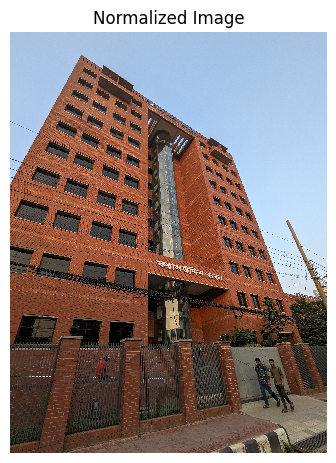

In [ ]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
I = I/255
io.imshow(I)
plt.title('Normalized Image')
plt.axis('off')

plt.show()


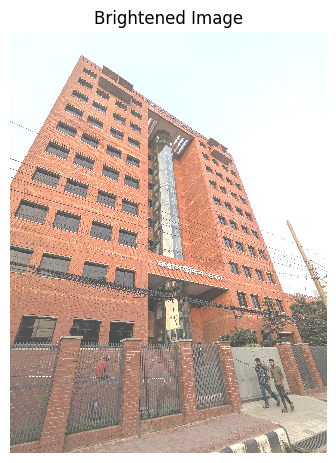

In [ ]:
# Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright and display it.



I = I +0.3


I_bright = np.clip(I, 0, 1)




io.imshow(I_bright)
plt.title('Brightened Image')
plt.axis('off')

plt.show()

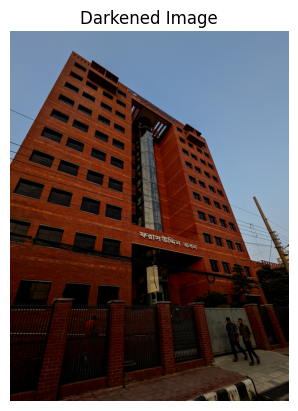

In [ ]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark and display it.



I= I - .5


I_dark = np.clip(I, 0, 1)



plt.imshow(I_dark)
plt.title('Darkened Image')
plt.axis('off')

plt.show()



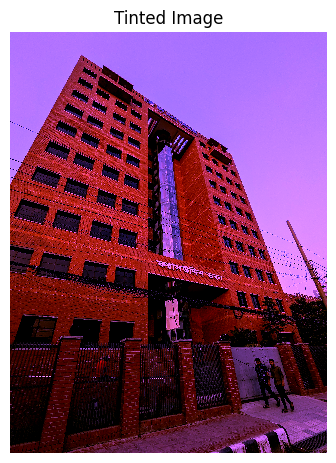

In [ ]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift


I_tint = np.zeros(I.shape)
I_tint[:, :, 0] = 1.5 * I[:, :, 0]
I_tint[:, :, 1] = 0.8 * I[:, :, 1]
I_tint[:, :, 2] = 2.5 * I[:, :, 2]

I_tint = np.clip(I_tint, 0, 1)






io.imshow(I_tint)
plt.title('Tinted Image')
plt.axis('off')

plt.show()
# HINT:
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......



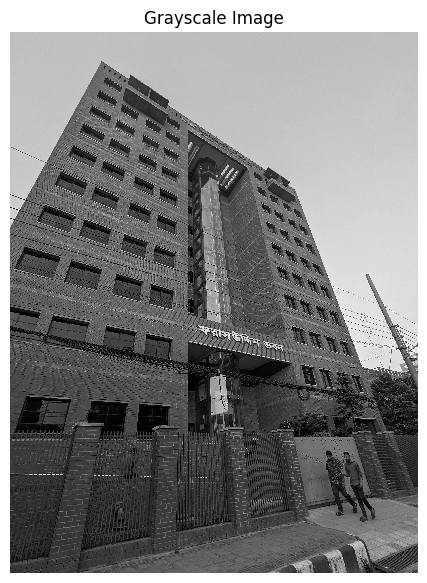

In [ ]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I = io.imread("/content/PXL_20231106_104552059.jpg")
I_gray =  color.rgb2gray(I)
io.imshow(I_gray)
plt.title('Grayscale Image')
plt.axis('off')

plt.show()



(-0.5, 3071.5, 4079.5, -0.5)

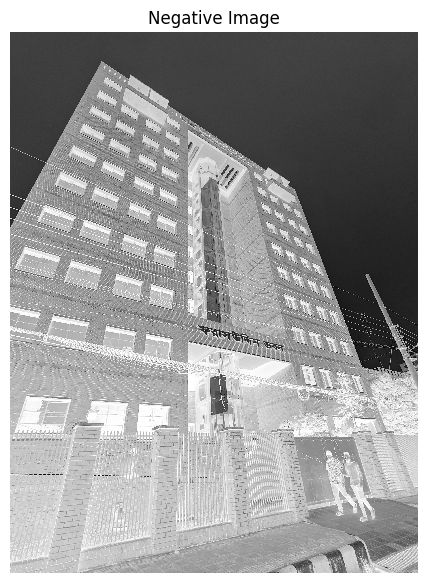

In [ ]:
# Display the negative of the grayscale image


I = io.imread("/content/PXL_20231106_104552059.jpg")
I_neg = (1- I_gray)
io.imshow(I_neg)
plt.title('Negative Image')
plt.axis('off')




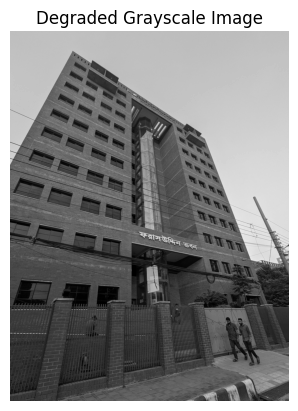

In [ ]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes





I_degraded = (0.3 * (I_gray - I_gray.min()) / (I_gray.max() - I_gray.min()) + 0.6)


I_degraded = np.clip(I_degraded, 0, 1)




plt.imshow(I_degraded, cmap='gray')
plt.title('Degraded Grayscale Image')
plt.axis('off')

plt.show()




In [ ]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1
I = io.imread("/content/PXL_20231106_104552059.jpg")
def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    I_stretched = np.zeros(I.shape)
    I_stretched[I <= r1] = I[I <= r1] * s1 / r1
    I_stretched[(I > r1) & (I <= r2)] = (I[(I > r1) & (I <= r2)] - r1) * (s2 - s1) / (r2 - r1) + s1
    I_stretched[I > r2] = (I[I > r2] - r2) * (1 - s2) / (1 - r2) + s2

    return I_stretched





(-0.5, 3071.5, 4079.5, -0.5)

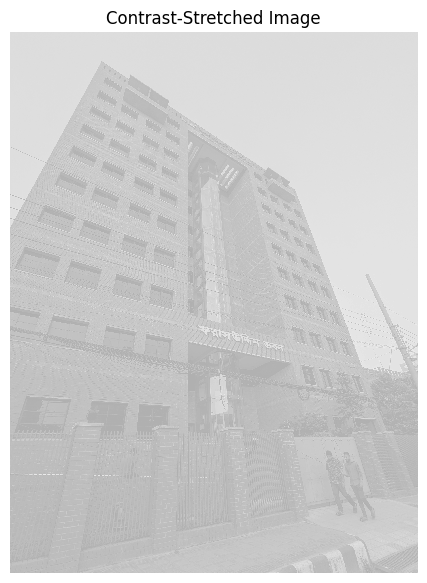

In [ ]:
# To test your implementation, contrast strech the degraded image I_degrade

r1 = 0.2
r2 = 0.1
s1 = 0.7
s2 = 0.3
I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)



io.imshow(I_stretched)
plt.title('Contrast-Stretched Image')
plt.axis('off')





# Task 2 - Histogram and Equalization

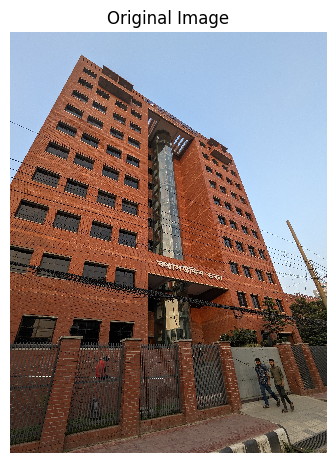

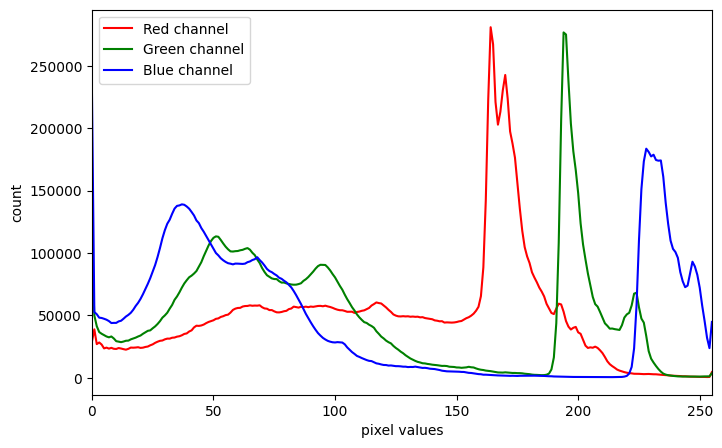

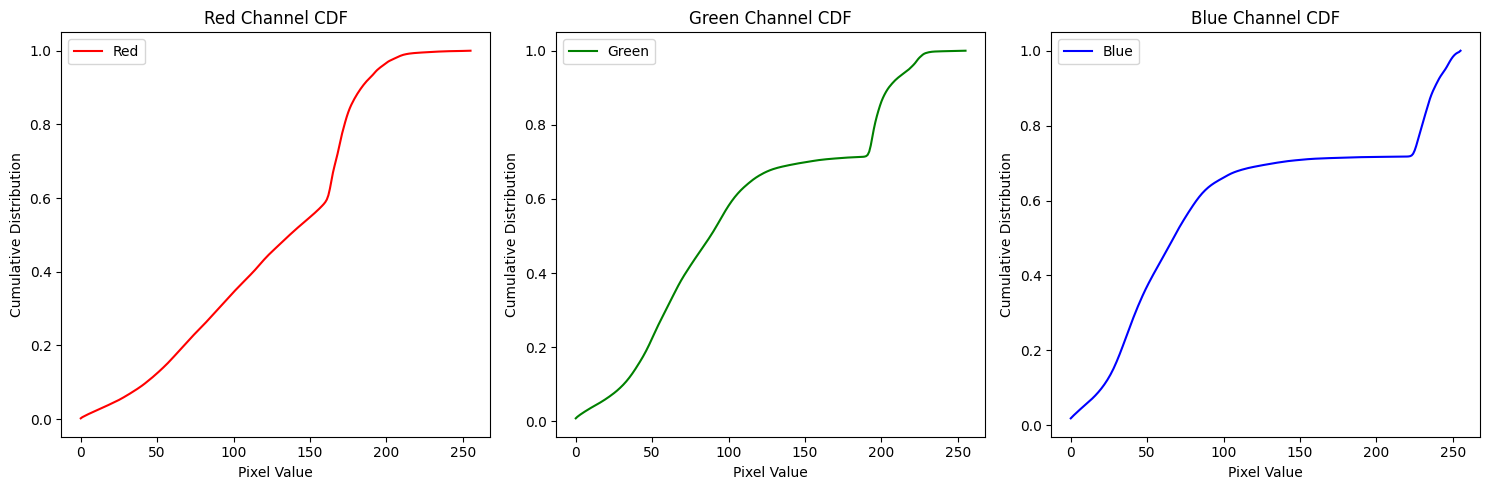

In [ ]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms


io.imshow(I)
plt.axis('off')
plt.title('Original Image')
plt.show()



def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    plt.figure(figsize=(8,5))
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])

    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])
plot_hist_color(I)
plt.show()






from skimage.exposure import cumulative_distribution

red = I[:, :, 0]
green = I[:, :, 1]
blue = I[:, :, 2]


cdf_red, bin_centers_red = cumulative_distribution(red, nbins=256)
cdf_green, bin_centers_green = cumulative_distribution(green, nbins=256)
cdf_blue, bin_centers_blue = cumulative_distribution(blue, nbins=256)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(bin_centers_red, cdf_red, color='red', label='Red')
plt.title('Red Channel CDF')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Distribution')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(bin_centers_green, cdf_green, color='green', label='Green')
plt.title('Green Channel CDF')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Distribution')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(bin_centers_blue, cdf_blue, color='blue', label='Blue')
plt.title('Blue Channel CDF')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Distribution')
plt.legend()

plt.tight_layout()

plt.show()




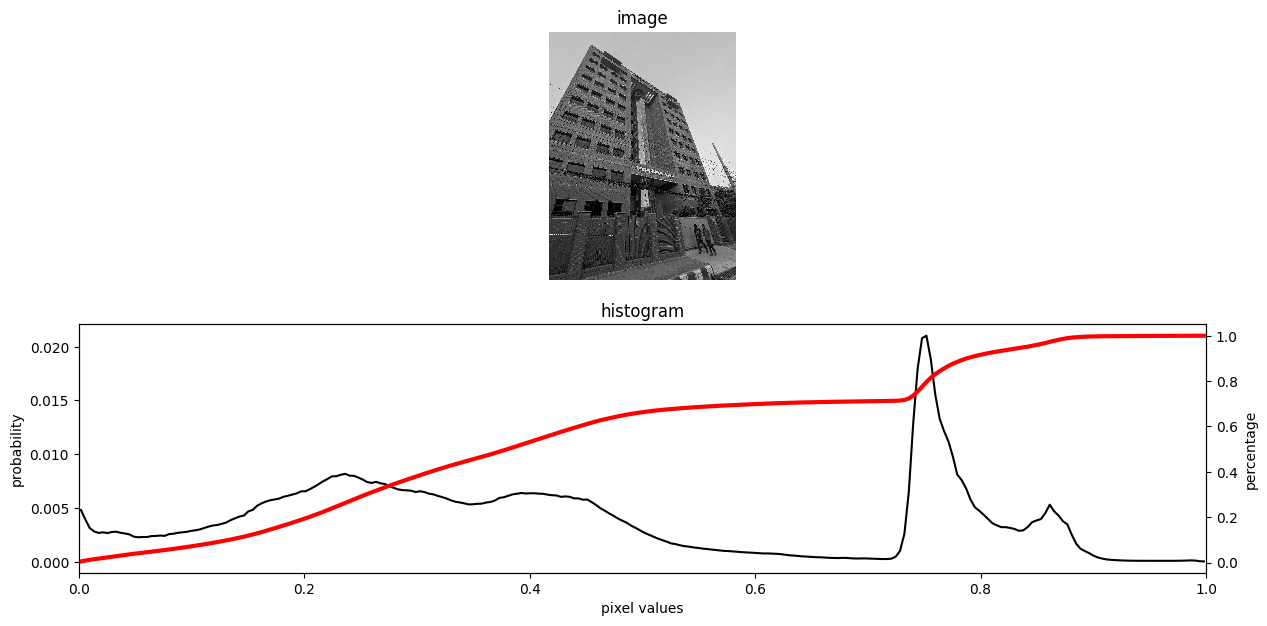

In [ ]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray


def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")
plt.rcParams['figure.figsize'] = (5, 5)
plot_img_and_hist(I_gray, normalize=True)
plt.show()


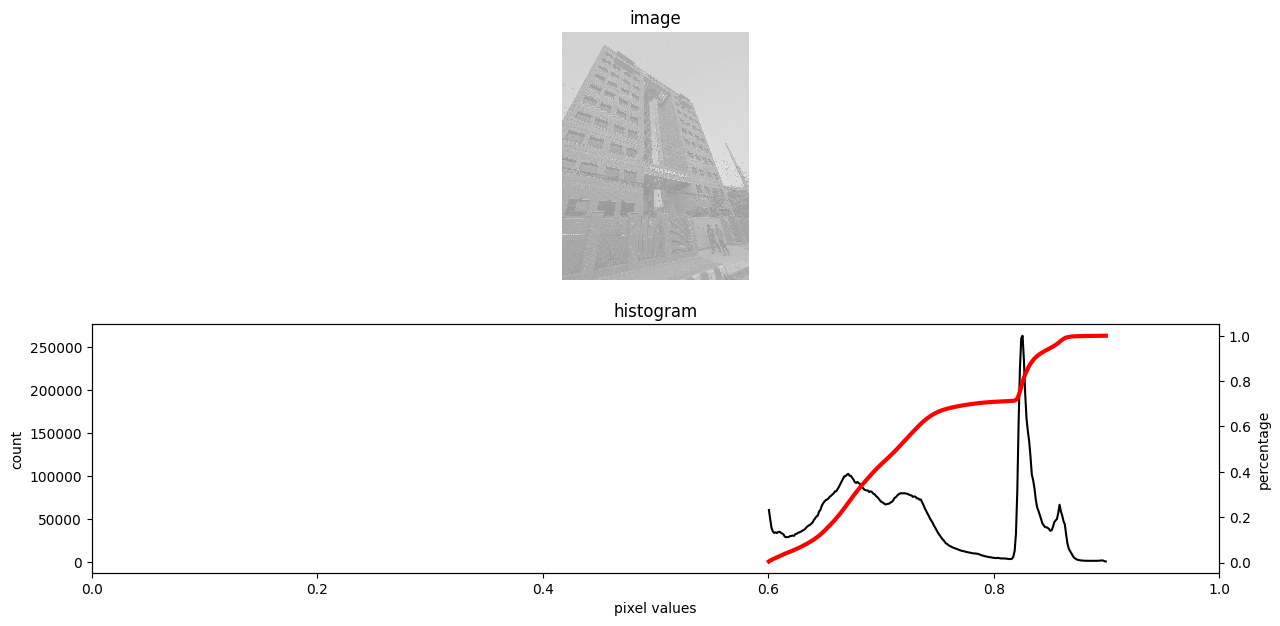

In [ ]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded


plt.rcParams['figure.figsize'] = (5, 5)
plot_img_and_hist(I_degraded)


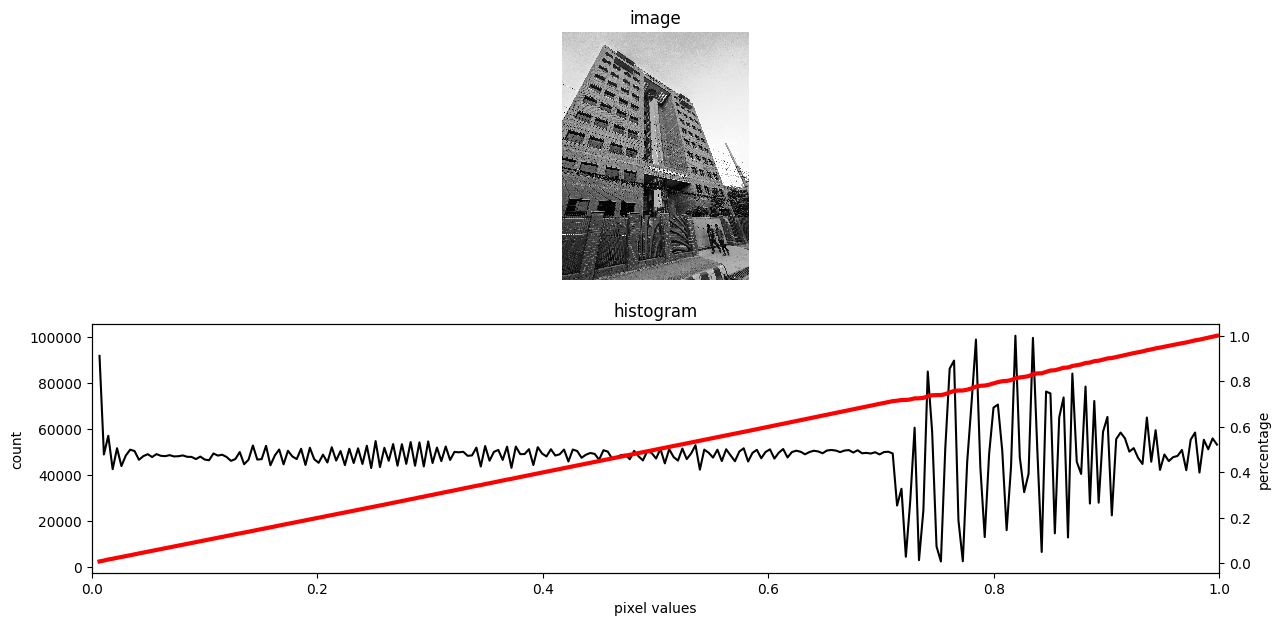

In [ ]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram


I_recon_gray = exposure.equalize_hist(I_degraded)
plt.rcParams['figure.figsize'] = (5, 5)
plot_img_and_hist(I_recon_gray)




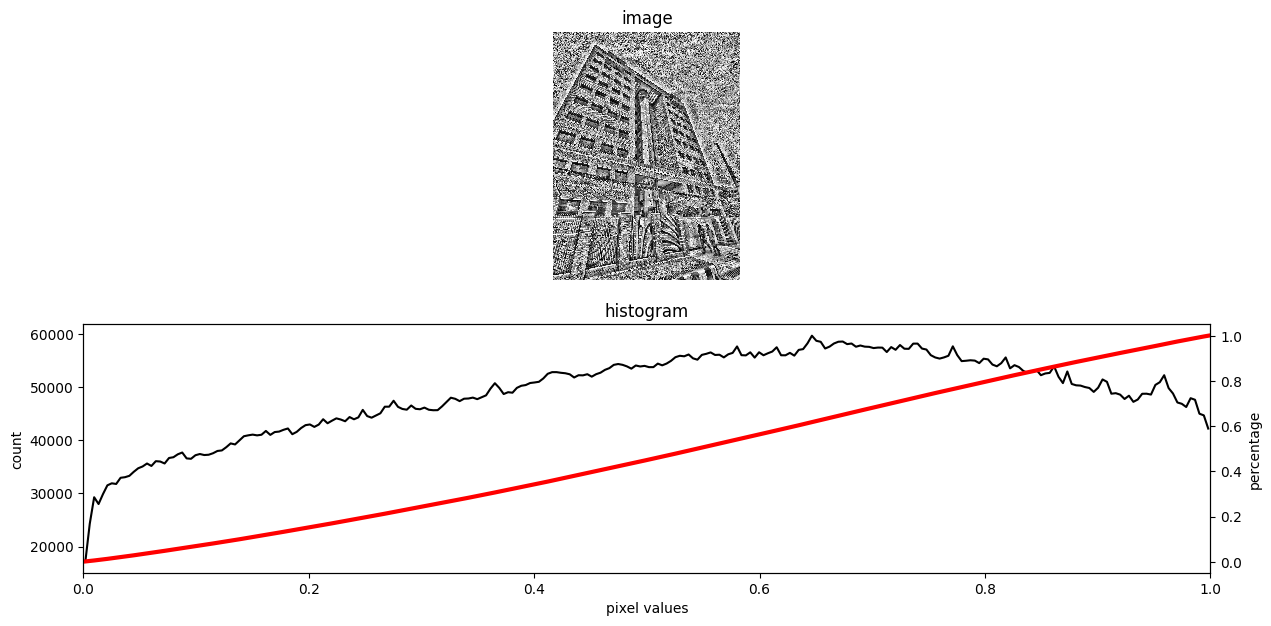

In [ ]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 =exposure.equalize_adapthist(I_degraded, kernel_size=(128, 128), clip_limit=0)

plot_img_and_hist(I_recon_gray_2)


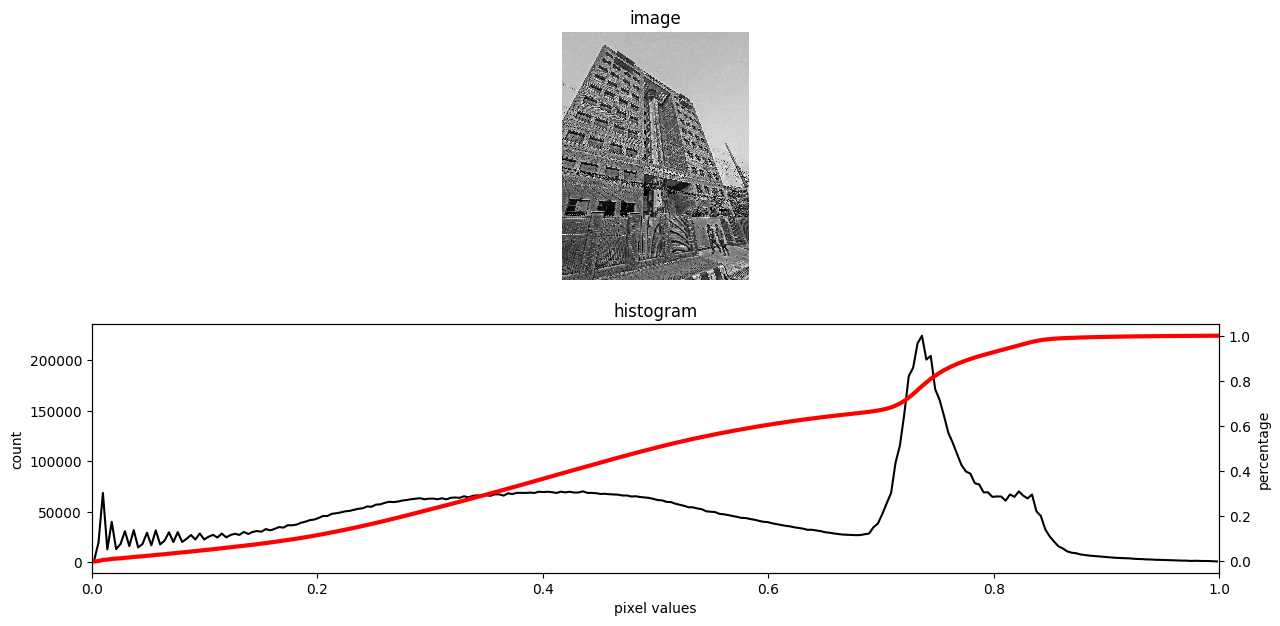

In [ ]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 =  exposure.equalize_adapthist(I_degraded, kernel_size=(64, 64), clip_limit=0.01)
plot_img_and_hist(I_recon_gray_3)


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 1533364 pixels
  return func(*args, **kwargs)


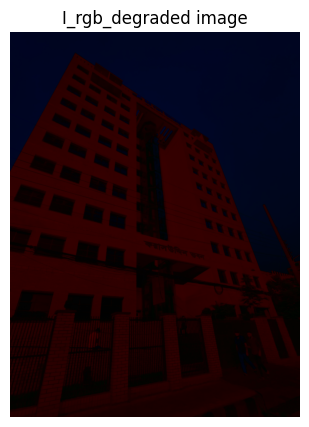

In [ ]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it



from skimage.color import lab2rgb, rgb2lab




I_rgb_degraded = rgb2lab(I)


l_min = 0.3
l_max = 0.6
I_rgb_degraded[:, :, 0] = np.clip(I_rgb_degraded[:, :, 0], l_min, l_max)


I_rgb_degraded = lab2rgb(I_rgb_degraded)


plt.imsave('I_rgb_degraded.jpg', I_rgb_degraded)


plt.imshow(I_rgb_degraded)
plt.title('I_rgb_degraded image')
plt.axis('off')
plt.show()



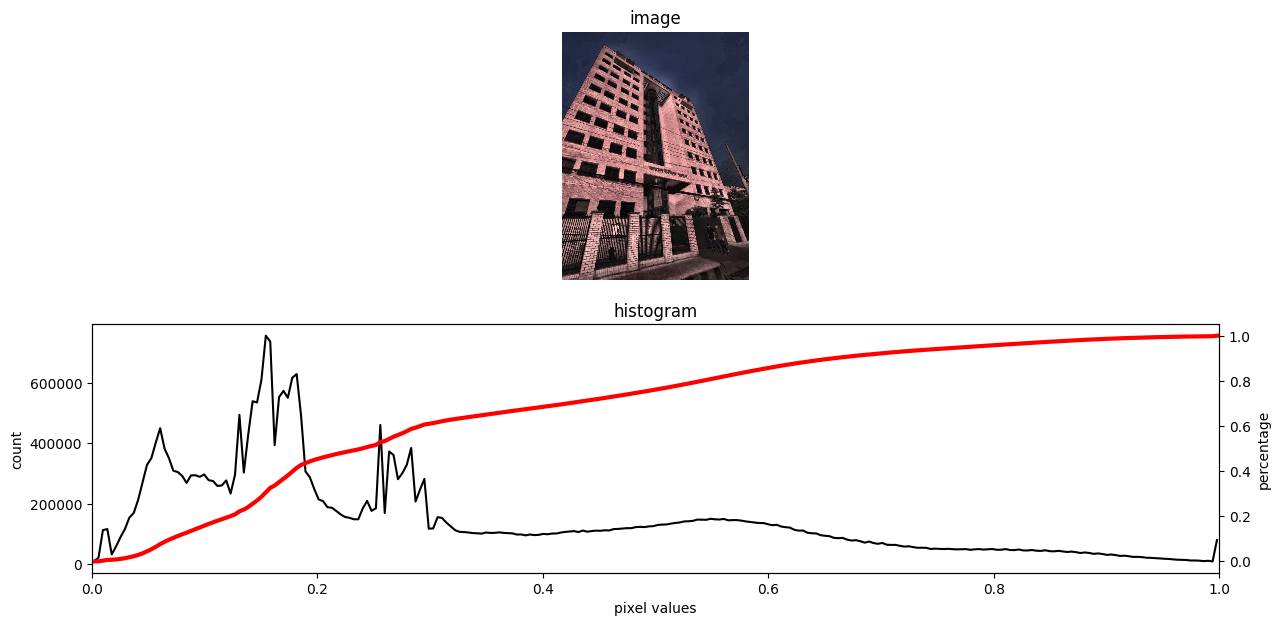

In [ ]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes

I_recon_color = color.rgb2lab(I_rgb_degraded)
I_recon_color[:, :, 0] = I_recon_color[:, :, 0] / 100.0
I_recon_color[:, :, 0] = exposure.equalize_adapthist(I_recon_color[:, :, 0], kernel_size=(256,256), clip_limit=0.01)
I_recon_color[:, :, 0] = I_recon_color[:, :, 0] * 100.0
I_recon_color = color.lab2rgb(I_recon_color)



plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_recon_color)




# Task 3 - Open Ended
 ## ***There are 3 images in the drive directory below. Look at the questions from the brackets [.]. Answer them in the provided text cell at the bottom.***

 ### link:  https://drive.google.com/drive/folders/1ft3XrO-MGxhxL2PfcLCFQjU0wvvlLAv4?usp=sharing

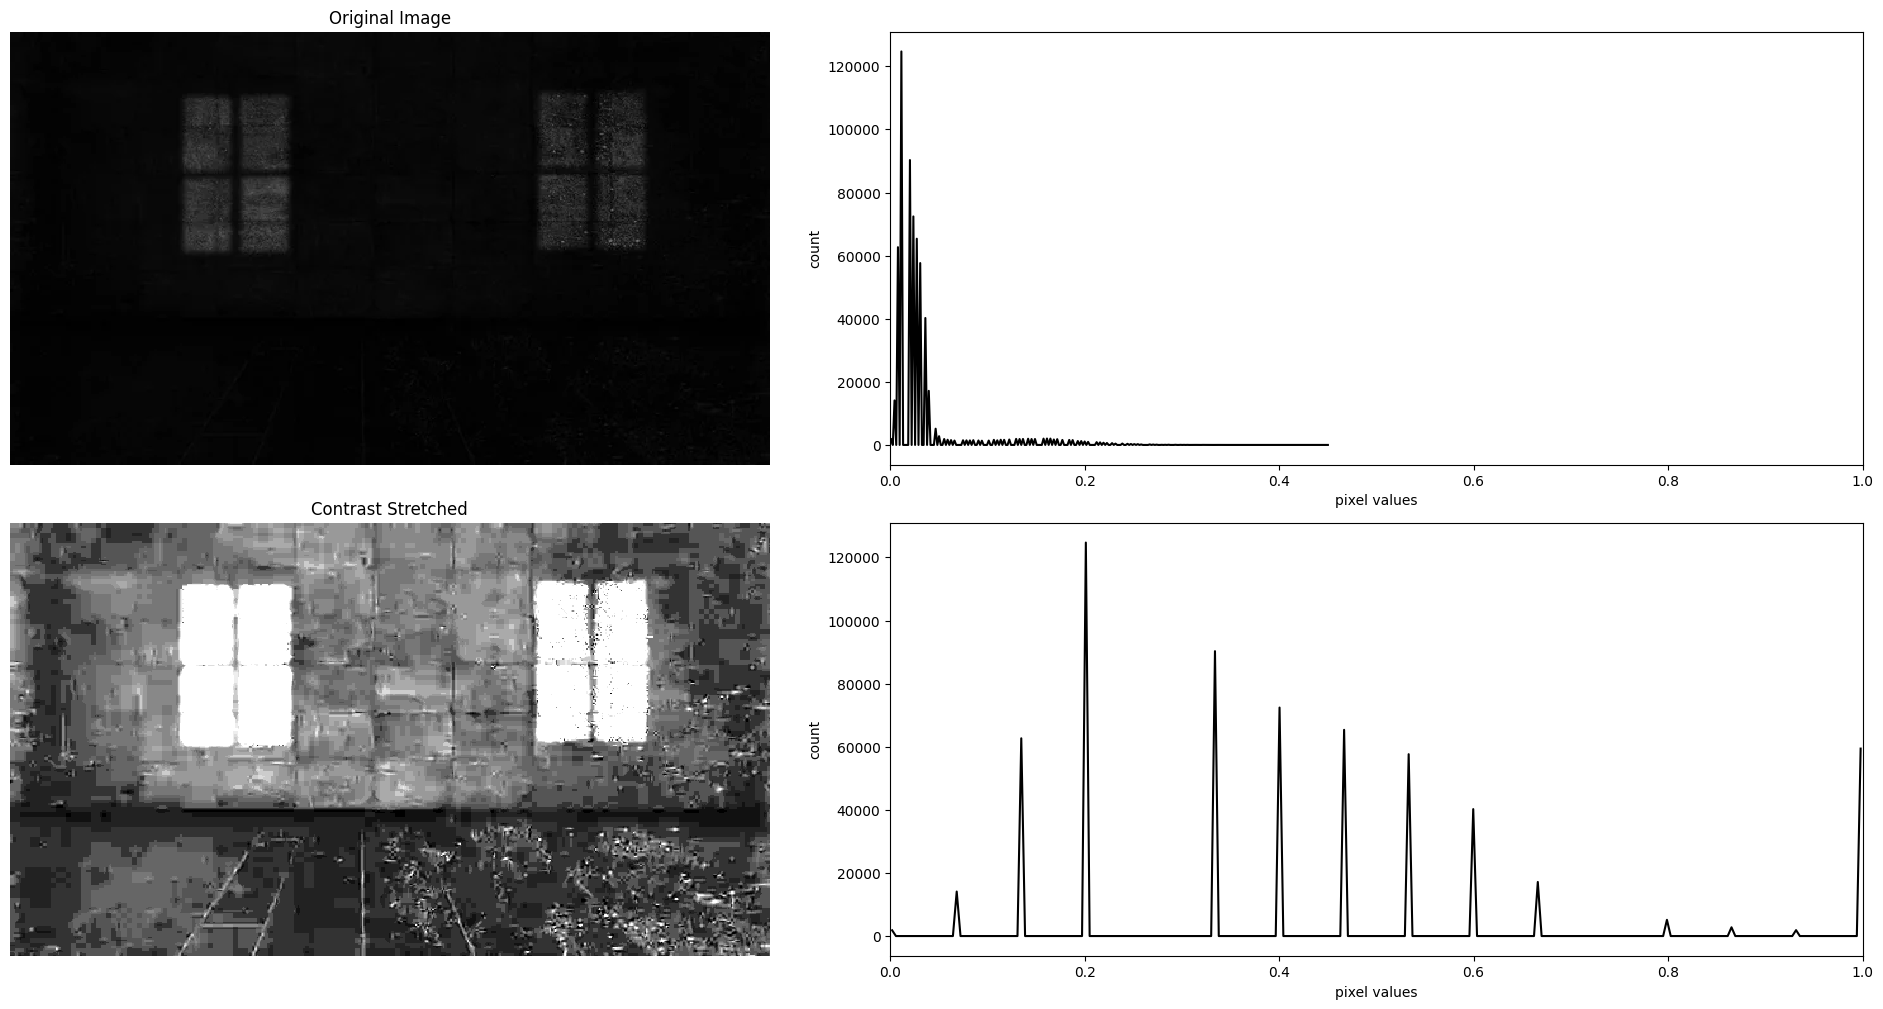

In [ ]:
# Dark_Room.jpg = very dark [The windows are on walls. How does the wall look like?]
#It's a very dark room and we can see only 2 windows. If we do contrast streching in this image, then we will find the image very clear.


# Foggy_Road.jpg = washed out/foggy [How many vehicles do you think there are?]
# I see only 5  vehicles in this image. If  I want to see the clean image and awnt to count the vehicles number then I have to equalize the image.



# Read_the_code.jpg = Dark RGB Barcode [What is hidden in the Barcode?
#                                       Make it scanable, scan it and say something about the hidden message.]
#We can't scan the barcode as it is very dark. If I use contrast strech the image then we will find the clear barcode. After doing this, I find  the CSE428 practice sheet in this barcode.


# Your task is to improve these images using
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result


#forthe dark room
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
I = io.imread("Dark_Room.jpg")
I = I/255.0
io.imshow(I)
plt.title('Original Image')
plt.axis('off')
plt.subplot(2,2,2)
plot_hist(I, nbins=256, normalize=False, plot_cdf=False)
plt.subplot(2,2,3)
I_contrast_stretched = np.clip(I * 17, 0, 1)
io.imshow(I_contrast_stretched)
plt.title('Contrast Stretched')
plt.axis('off')
plt.subplot(2,2,4)
plot_hist(I_contrast_stretched, nbins=256, normalize=False, plot_cdf=False)







/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


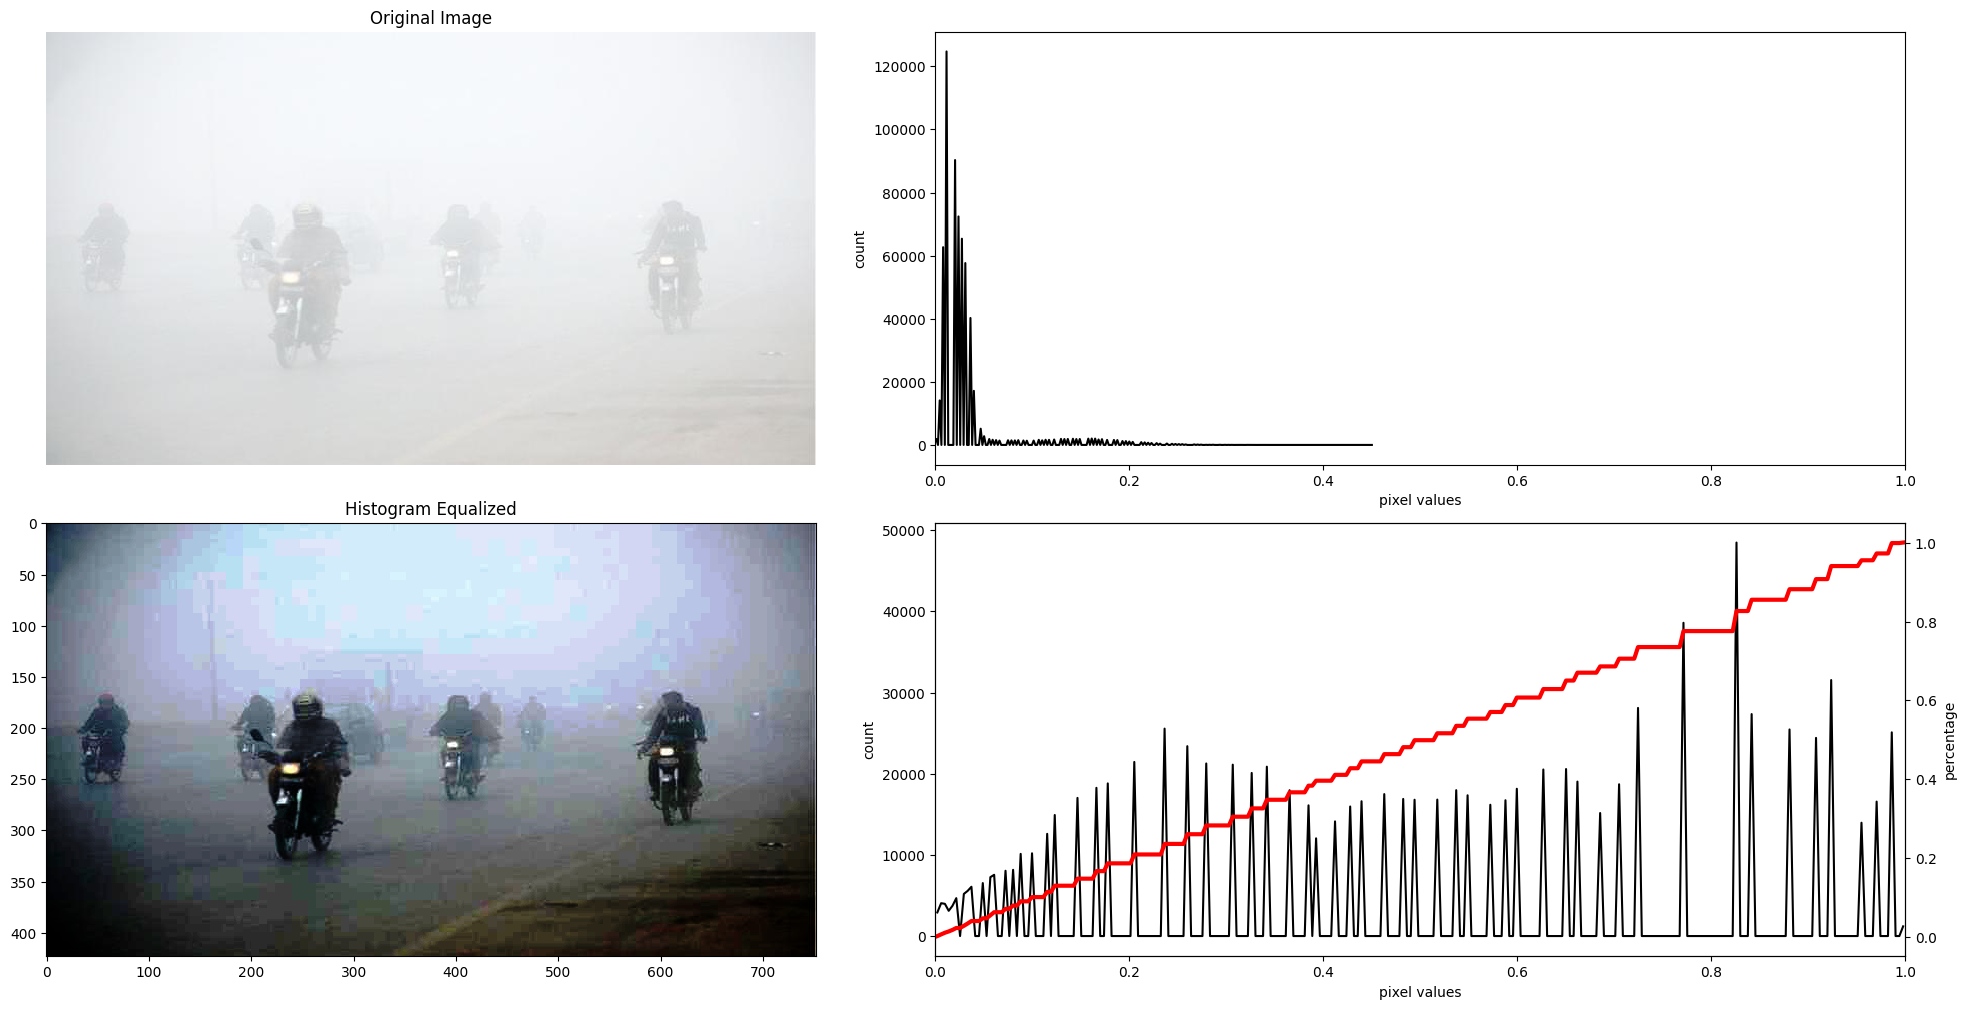

In [ ]:
#for the foggy road
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
J = io.imread("Foggy_Road.jpg")
J = J/255.0
io.imshow(J)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plot_hist(I, nbins=256, normalize=False, plot_cdf=False)
plt.subplot(2,2,3)
Jeq = exposure.equalize_hist(J)
io.imshow(Jeq)
plt.title('Histogram Equalized')
plt.subplot(2,2,4)
plot_hist(Jeq)


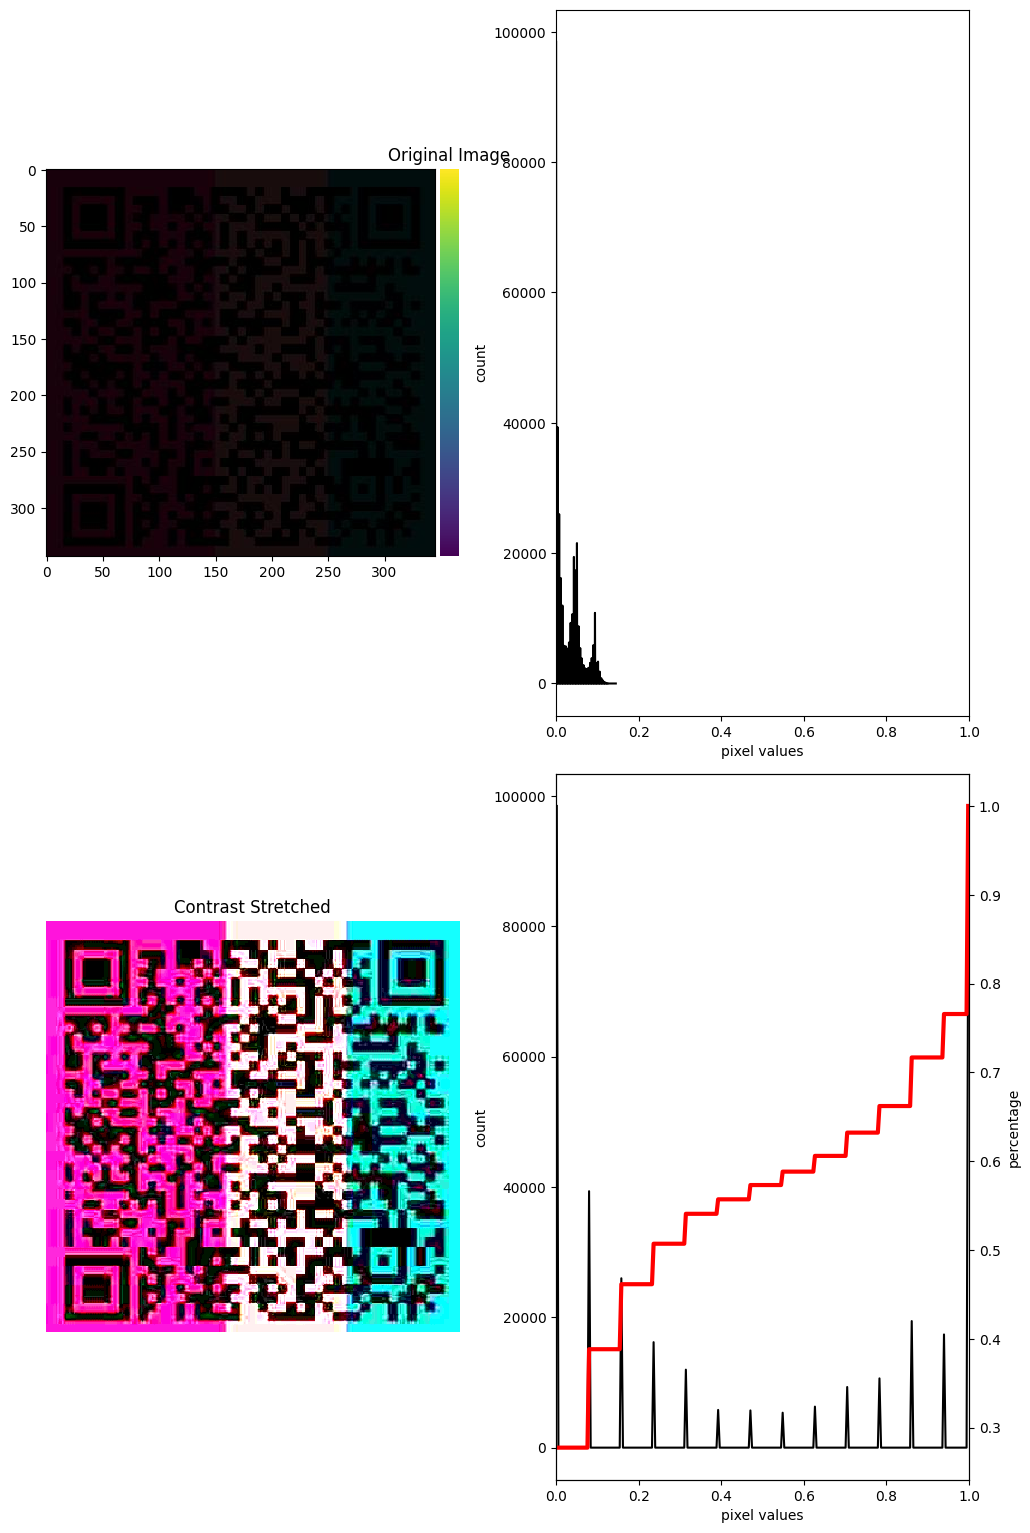

In [ ]:
#for dark rgb barcode
plt.figure(figsize=(10,15))
plt.subplot(2,2,1)
K = io.imread("Read_the_code.jpg")
K = K/255
io.imshow(K)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plot_hist(K, nbins=256, normalize=False, plot_cdf=False)

plt.subplot(2,2,3)
K_contrast_stretched = np.clip(K * 20, 0, 1)
io.imshow(K_contrast_stretched)
plt.title('Contrast Stretched')
plt.axis('off')

plt.subplot(2,2,4)
plot_hist(K_contrast_stretched)



### Your answers:

abc abc abc ... ...